# Machine Learning A-Z Python

## Classification

## K-Nearest Neighbor (NON-linear classifier)

We generally use regression (simple, multiple, polynomial etc) to predict a continuous number.

Classification is used to predict a category<br/>
* **Linear classifier:** Logistic Regression, SVM

* **Non-Linear classifier:** K-NN, Kernel SVM, Random Forest

**Business Problem:** Client has started a brand new luxary SUV. Job is to figure out who in the social network (based on available data) is willing to buy this brand new SUV.

In [1]:
# Data Preprocessing

# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
dataset= pd.read_csv('Social_Network_Ads.csv')
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [2]:
# Independent variable: Age, Estimated Salary,
# Dependent variable: Salary
X=dataset.iloc[:,2:4].values # independent variables
X.ndim, X.shape  # needs to be 2-D matrix

(2, (400, 2))

In [3]:
y=dataset.iloc[:,-1].values # dependent variable
y.ndim, y.shape # needs to be 1-D vector

(1, (400,))

In [4]:
print(X[:5]) # confirm it do NOT have dependent variable 
print('------------------------------------')
print(y[:5]) # confirm it only contain  dependent variable

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
------------------------------------
[0 0 0 0 0]


In [5]:
## Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size=0.25, 
                                                  random_state=0)
print(X_train.shape)
print(y_train.shape)

(300, 2)
(300,)


In [6]:
# Feature scaling part: Data preprocessing
from sklearn.preprocessing import StandardScaler # StandardScaler class
sc_X = StandardScaler() # creating sc_x, a StandardScaler object
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


• Generally FEATURE SCALING is necessary (In case of regression we do not need to do it in the case of Random Forest because their splitting does NOT depend on euclidian distance)

• Look at the `AGE` range and `ESTIMATED SALARY` range. Huge difference.

• ML model depends on euclidian distance. Suppose there are 2 points, then
euclidian distance is calculated by `((y2-y1)^2+(x2-x1)^2)^1/2`. Now if one variable (here salary)
has a way higher range/scale and then it is squared and added with other variable square (age here whose 
value is negligible even after squaring) then ML will only consider salary squared value as it is so 
high and thus effect of age won't be considered. Feature scaling normalize data in a way to allow considering all variables.

• Now feature scaling can be done such that each variable is standardize and belongs to ranges from -1 to +1. And thus their high range wont affect ML model to be biased

**1. STANDARDIZATION:** `x_standardization`= `x - mean(x)` / `standard deviation(x)`<br/>
**2. NORMALIZATION:** `x_normalization` = `x - min(x)` / `max(x) - min(x)`

**CODE:**

'''<br/>
`from sklearn.preprocessing import StandardScaler`

`sc_X = StandardScaler()`

`X_train = sc_X.fit_transform(X_train)`

`X_test = sc_X.transform(X_test)`<br/>
'''

If we have to standardscaler y, add the following code to the above code--

'''<br/>
`sc_y = StandardScaler()`

`y_train = sc.y.fit_transform(y_train)`<br/>
'''

• For test set, we do NOT need to fit the sc_X instance because it's already fitted to training set
That means X_test is transformed by StandardScaler object based on its fitting to the X_train. So 
both X_train and X_test are fitted on the same scale.

• Here dependent variable or y is categorical as it has 1 or 0 values, we do NOT need to use feature scaling for classification.

• But for regression where dependent variable or y can take a huge range/scale (unlike classification), we need to use feature scaling for y as well.

In [7]:
print(X_train[:5]) # confirm X_train is standardized 
print('------------------------------------')
print(X_test[:5]) # confirm X_test is standardized 

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]
------------------------------------
[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]]


In [8]:
# Fitting classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
# classifier is a KNeighborsClassifier object
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

We need to chose Euclidian distance. For that we need to select 'metric' atfirst which will be **'minkowski'** by deafult. Then we have to chose **P**. If P is 1 it is **Manhattan distance** and if P is 2, it will be **Euclidian distance**

In [9]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
# class like KNeighborsClassifier, starts with capital word
# function like confusion_matrix do NOT start with capital
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

**∆** In **Logistic Regression** we had **11** incorrect predictions. Here in K-NN we had only **7** incorrect predicitions. So model predicition improved

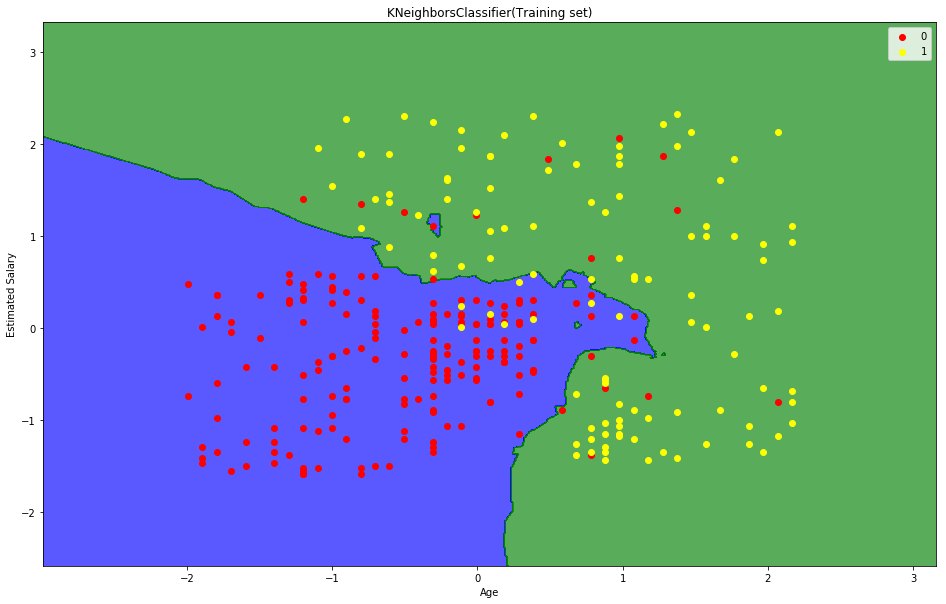

In [11]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), 
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.figure(figsize=(16,10))


plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.65, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'yellow'))(i), label=j)
    
plt.title('KNeighborsClassifier(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
# Code explainied in Logistic Regression

**RESULT :** We see K-NN classifier is a **NON-LINEAR classifier** as the **Prediciton boundary** is not a straight line. It DOES NOT have the bottleneck of being a linear classifier and thus does a better job of predicting the category of the training set.

All the red observation (social media users who do not buy the SUV) are in the blue region. Where blue region is the region that our model predicts users falling in the blue region do NOT buy the SUV. 
Whereas the green points (social media users who buys the SUV) are in the green region (region predicted by the model where users will buy the SUV).

But we still see some INCORRECT PREDICTIONS. This is because the number of neighbors in K-NN model is selected in a way that we do NOT overfit the model. Overfitting will give a good output on training data, but the model will not be generalized properly and would NOT do great with test or unknown data

In [12]:
# Visualizing the Test set results

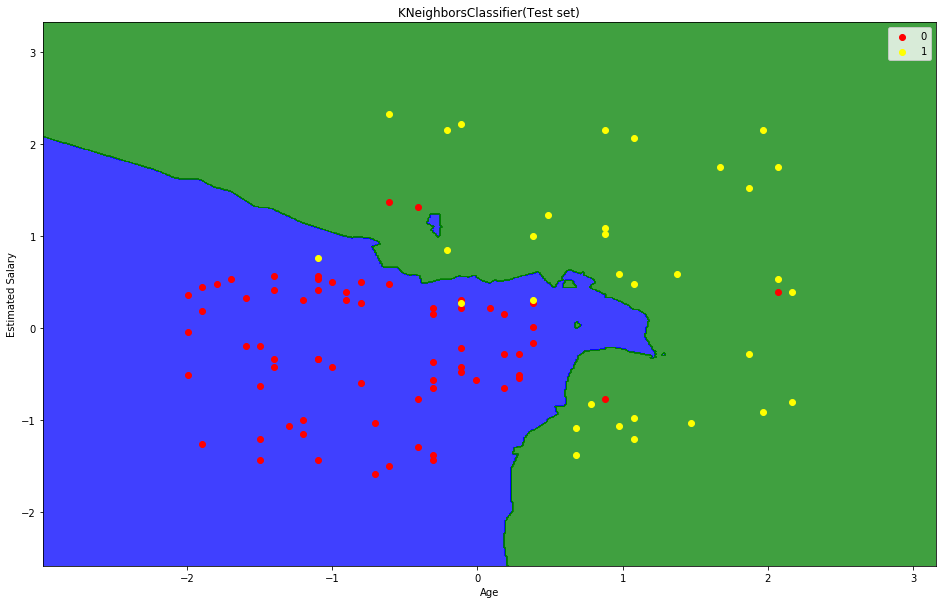

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step=0.01), 
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step=.01))
plt.figure(figsize=(16,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'yellow'))(i), label=j)

plt.title('KNeighborsClassifier(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**RESULT :** Here non-linear classifier i.e. K-NN classifier does a great job predicting and we only have 7 incorrect predictions